In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreysheth","key":"8d4072523969cec727c89029edce18dc"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install kaggle
!pip install "vegafusion[embed]>=1.5.0"
!pip install "vl-convert-python>=1.6.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.5/20.5 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 18.9 MB/s eta 0:00:00


In [ ]:
!kaggle datasets download -d shreysheth/f1-data

Dataset URL: https://www.kaggle.com/datasets/shreysheth/f1-data
License(s): unknown


In [ ]:
!unzip f1-data.zip -d f1_data

Archive:  f1-data.zip
  inflating: f1_data/circuits.csv    
  inflating: f1_data/constructor_results.csv  
  inflating: f1_data/constructor_standings.csv  
  inflating: f1_data/constructors.csv  
  inflating: f1_data/driver_standings.csv  
  inflating: f1_data/drivers.csv     
  inflating: f1_data/lap_times.csv   
  inflating: f1_data/pit_stops.csv   
  inflating: f1_data/qualifying.csv  
  inflating: f1_data/races.csv       
  inflating: f1_data/results.csv     
  inflating: f1_data/seasons.csv     
  inflating: f1_data/sprint_results.csv  
  inflating: f1_data/status.csv      


In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import os

In [ ]:
data_dir = "f1_data"  # Change if needed

circuits = pd.read_csv(os.path.join(data_dir, "circuits.csv"))
constructor_results = pd.read_csv(os.path.join(data_dir, "constructor_results.csv"))
constructor_standings = pd.read_csv(os.path.join(data_dir, "constructor_standings.csv"))
constructors = pd.read_csv(os.path.join(data_dir, "constructors.csv"))
driver_standings = pd.read_csv(os.path.join(data_dir, "driver_standings.csv"))
drivers = pd.read_csv(os.path.join(data_dir, "drivers.csv"))
lap_times = pd.read_csv(os.path.join(data_dir, "lap_times.csv"))
pit_stops = pd.read_csv(os.path.join(data_dir, "pit_stops.csv"))
qualifying = pd.read_csv(os.path.join(data_dir, "qualifying.csv"))
races = pd.read_csv(os.path.join(data_dir, "races.csv"))
results = pd.read_csv(os.path.join(data_dir, "results.csv"))
seasons = pd.read_csv(os.path.join(data_dir, "seasons.csv"))
sprint_results = pd.read_csv(os.path.join(data_dir, "sprint_results.csv"))
status = pd.read_csv(os.path.join(data_dir, "status.csv"))

We will now check if the data we have has been correctly loaded.

In [ ]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26759 non-null  int64  
 1   raceId           26759 non-null  int64  
 2   driverId         26759 non-null  int64  
 3   constructorId    26759 non-null  int64  
 4   number           26759 non-null  object 
 5   grid             26759 non-null  int64  
 6   position         26759 non-null  object 
 7   positionText     26759 non-null  object 
 8   positionOrder    26759 non-null  int64  
 9   points           26759 non-null  float64
 10  laps             26759 non-null  int64  
 11  time             26759 non-null  object 
 12  milliseconds     26759 non-null  object 
 13  fastestLap       26759 non-null  object 
 14  rank             26759 non-null  object 
 15  fastestLapTime   26759 non-null  object 
 16  fastestLapSpeed  26759 non-null  object 
 17  statusId    

In the code below, we are using vegafusion, which enables us to work with such large datasets as normal methods won't let us use so many datapoints for data visualization. Vegafusion provides the blocks on which we will build the vega altair visualizations which are optimal for data visualizations with huge datasets. We pre-installed these previously using pip (python installer package).

In [ ]:
import altair as alt

# Enable the VegaFusion data transformer to handle large datasets.
alt.data_transformers.enable('vegafusion')

# Create a scatter plot of points earned vs. starting grid position
points_vs_grid = alt.Chart(results).mark_point().encode(
    x='grid',
    y='points',
    tooltip=['grid', 'points']
).properties(
    title="Points Earned vs. Starting Grid Position"
)

points_vs_grid

alt.Chart(...)

### Observations
- Negative Correlation:

  - As the grid position increases (i.e. drivers start further back), the points earned tend to decrease.

  - This suggests that starting closer to the front gives a significant advantage.

- High Points from Front Rows:

  - Most drivers who earn high points (15–25+) tend to start in the top 10 grid positions.

  - Especially noticeable clustering at grid positions 1–5.

- Rare High Scorers from the Back:

  - Very few data points show drivers starting from grid positions beyond 15 and still earning high points.

  - These are likely exceptional performances or races with heavy attrition/weather/penalties.

- Zero Point Clusters:

  - At all grid positions, there's a concentration at 0 points, showing many drivers often finish outside point-scoring positions.

### Inference
- Track Position Matters: Starting position plays a key role in a driver’s ability to score points—especially given how competitive F1 races are.

- Qualifying Performance is Crucial: Consistently starting in the front gives a higher statistical chance of earning strong points.

- Exceptions Exist: But the outliers also highlight the importance of race strategy, overtaking ability, and sometimes, sheer luck.

## Data Cleaning and Merging

We will now clean the data by dropping unwanted columns and data and merging what we need for a better understanding and analysis.

In [ ]:
# Drop columns that add little value or are duplicates
drivers_clean = drivers.drop(columns=['url', 'number', 'code'])
constructors_clean = constructors.drop(columns=['url'])
races_clean = races.drop(columns=['time', 'url'])
circuits_clean = circuits.drop(columns=['url'])

In [ ]:
# Merge results with races and drivers
race_results = results.merge(races_clean, on='raceId') \
                      .merge(drivers_clean, on='driverId') \
                      .merge(constructors_clean, on='constructorId') \
                      .merge(circuits_clean, on='circuitId')

# Add year to make filtering easier
race_results['year'] = pd.to_datetime(race_results['date']).dt.year


## Analysis Of the Data

### Most Successful Drivers of All-Time

In [ ]:
top_drivers = race_results.groupby(['driverId', 'forename', 'surname'])['points'].sum().reset_index()
top_drivers = top_drivers.sort_values(by='points', ascending=False).head(10)

print(top_drivers)

     driverId   forename     surname  points
0           1      Lewis    Hamilton  4820.5
19         20  Sebastian      Vettel  3098.0
828       830        Max  Verstappen  2912.5
3           4   Fernando      Alonso  2329.0
7           8       Kimi   Räikkönen  1873.0
820       822   Valtteri      Bottas  1788.0
2           3       Nico     Rosberg  1594.5
813       815     Sergio       Pérez  1585.0
29         30    Michael  Schumacher  1566.0
842       844    Charles     Leclerc  1363.0


Text(0.5, 0, 'Total Points')

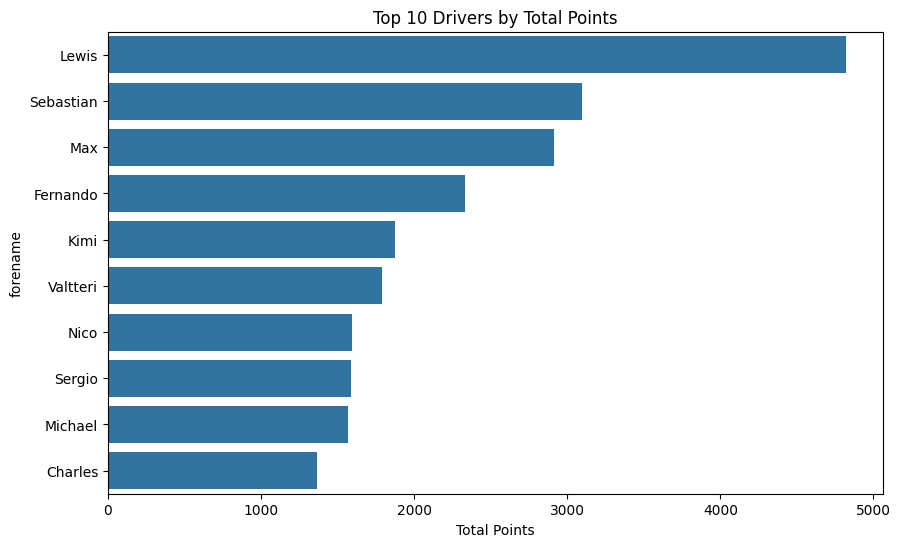

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='points', y='forename', data=top_drivers, orient='h')
plt.title('Top 10 Drivers by Total Points')
plt.xlabel('Total Points')

### Most Dominant Constructors (All-Time)

In [ ]:
top_teams = race_results.groupby('name')['points'].sum().sort_values(ascending=False).head(10)
print(top_teams)


name
Autodromo Nazionale di Monza      3088.00
Circuit de Monaco                 2905.50
Silverstone Circuit               2798.56
Circuit de Spa-Francorchamps      2591.50
Hungaroring                       2231.00
Autódromo José Carlos Pace        2203.00
Circuit Gilles Villeneuve         2163.00
Circuit de Barcelona-Catalunya    2106.00
Red Bull Ring                     1952.50
Suzuka Circuit                    1923.00
Name: points, dtype: float64


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

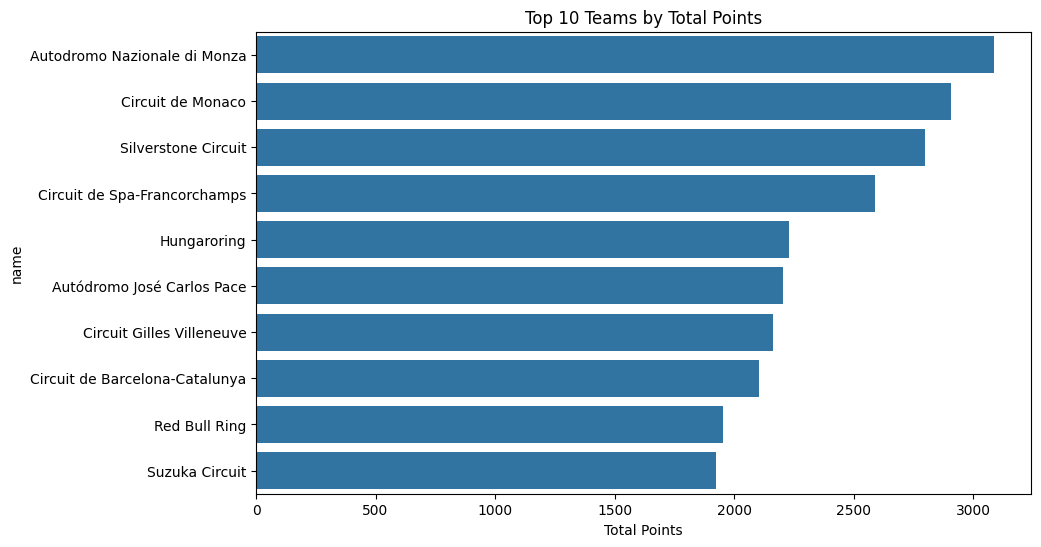

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_teams.values, y=top_teams.index)
plt.title('Top 10 Teams by Total Points')
plt.xlabel('Total Points')
plt

### Pole Position Win Rate

In [ ]:
pole_wins = race_results[(race_results['grid'] == 1) & (race_results['positionOrder'] == 1)]
pole_wins_rate = len(pole_wins) / len(race_results[race_results['grid'] == 1])

print(f"Pole-to-win conversion rate: {pole_wins_rate:.2%}")


Pole-to-win conversion rate: 42.34%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

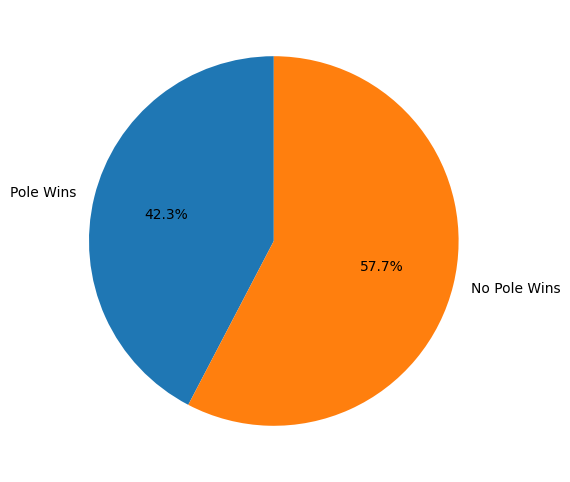

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie([pole_wins_rate, 1 - pole_wins_rate], labels=['Pole Wins', 'No Pole Wins'], autopct='%1.1f%%', startangle=90)
plt

### Grid Position vs Win Probability

<Axes: title={'center': 'Win Probability by Grid Position'}, xlabel='grid'>

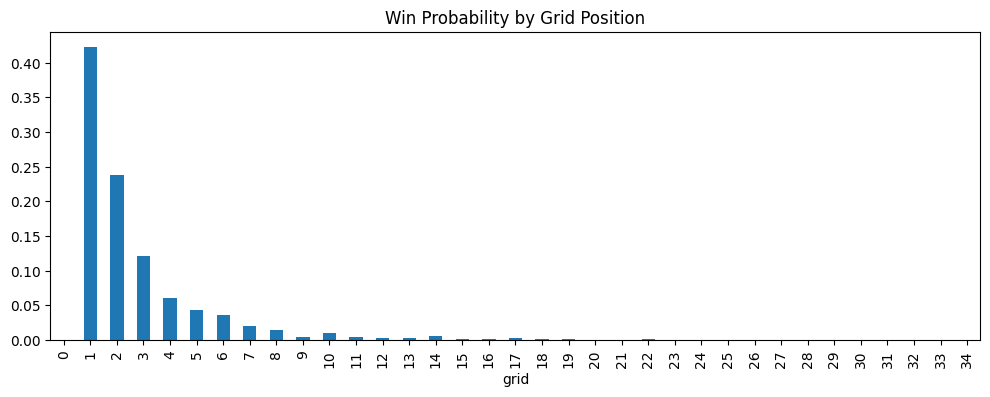

In [ ]:
grid_vs_win = race_results[race_results['positionOrder'] == 1].groupby('grid').size() \
    / race_results.groupby('grid').size()

grid_vs_win = grid_vs_win.fillna(0).sort_index()

grid_vs_win.plot(kind='bar', figsize=(12, 4), title="Win Probability by Grid Position")


### Evolution of Points per Race Over the Years

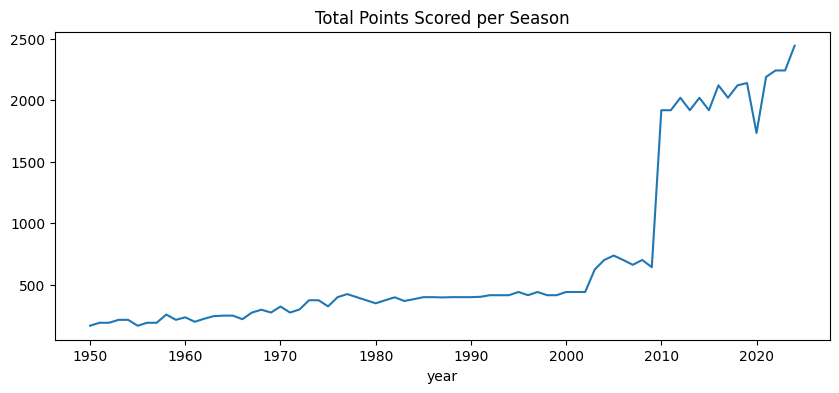

In [ ]:
points_per_year = race_results.groupby('year')['points'].sum().plot(
    kind='line', title='Total Points Scored per Season', figsize=(10, 4)
)


### Driver Consistency (Top 10 Finishes)

In [ ]:
# Percentage of races finished in top 10
driver_consistency = race_results[race_results['positionOrder'] <= 10]
top10_consistency = driver_consistency.groupby(['driverId', 'forename', 'surname'])['raceId'].count() / \
                    race_results.groupby(['driverId'])['raceId'].count()

top10_consistency = top10_consistency.dropna().sort_values(ascending=False).head(50)
print(top10_consistency)


driverId  forename           surname     
384       Luki               Botha           1.000000
802       Dorino             Serafini        1.000000
801       Charles            Pozzi           1.000000
800       Nello              Pagani          1.000000
794       Joie               Chitwood        1.000000
788       Joe                Fry             1.000000
322       David              Hobbs           1.000000
806       Óscar              González        1.000000
323       Dieter             Quester         1.000000
752       Helmut             Niedermayr      1.000000
471       Bruce              Johnstone       1.000000
469       Rob                Schroeder       1.000000
468       Roger              Penske          1.000000
448       Peter              Broeker         1.000000
544       Piero              Drogo           1.000000
493       Peter              Ryan            1.000000
497       Alberto Rodriguez  Larreta         1.000000
272       Kunimitsu          Takahashi  

### Avg Pit Stop Duration by Year

<Axes: title={'center': 'Average Pit Stop Duration by Year'}, xlabel='year'>

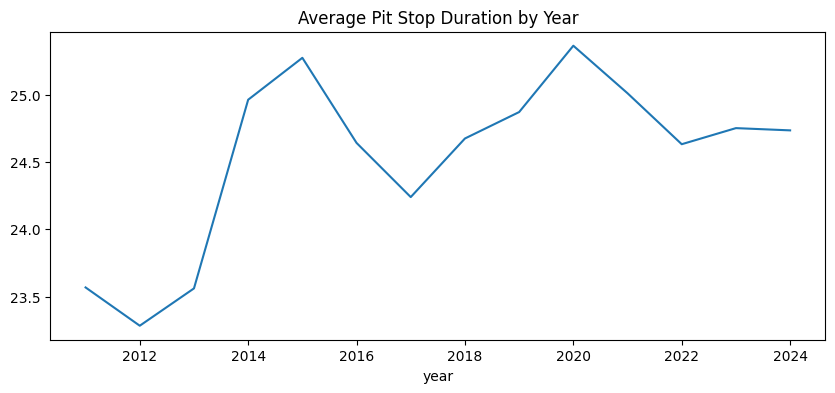

In [ ]:
pit_stops['duration'] = pd.to_numeric(pit_stops['duration'], errors='coerce')
pit_stops = pit_stops.merge(races_clean[['raceId', 'year']], on='raceId')
avg_pit_time = pit_stops.groupby('year')['duration'].mean()

avg_pit_time.plot(title='Average Pit Stop Duration by Year', figsize=(10,4))


### Drivers who Gained the Most Positions

In [ ]:
race_results['positions_gained'] = race_results['grid'] - race_results['positionOrder']
gainers = race_results.groupby(['forename', 'surname'])['positions_gained'].sum().sort_values(ascending=False).head(10)

print(gainers)


forename   surname   
Jonathan   Palmer        409
Mika       Salo          280
Marc       Surer         269
Luca       Badoer        252
Pedro      Diniz         245
Philippe   Streiff       242
Jos        Verstappen    223
Marc       Gené          213
Marcus     Ericsson      186
Christian  Fittipaldi    172
Name: positions_gained, dtype: int64


### Fastest Lap Analysis (Average Lap Time per Driver)

In [ ]:
lap_avg = lap_times.groupby('driverId')['milliseconds'].mean().sort_values().head(10)
lap_avg = lap_avg.reset_index().merge(drivers_clean[['driverId', 'forename', 'surname']], on='driverId')

print(lap_avg[['forename', 'surname', 'milliseconds']])


    forename        surname  milliseconds
0       Jack         Aitken  63319.402299
1     Pietro     Fittipaldi  80792.571429
2   Stéphane       Sarrazin  82907.903226
3  Cristiano       da Matta  86875.075472
4       Juan  Pablo Montoya  86976.960138
5      Allan         McNish  87315.032864
6     Franck       Montagny  87851.812500
7    Luciano          Burti  88575.052395
8      Scott          Speed  89131.074708
9      Ralph         Firman  89165.956182


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

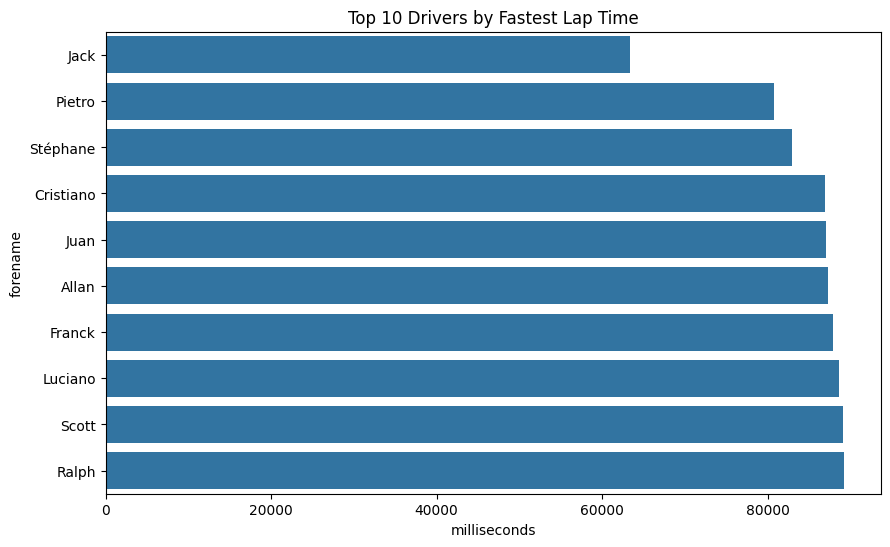

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='milliseconds', y='forename', data=lap_avg, orient='h')
plt.title('Top 10 Drivers by Fastest Lap Time')
plt

### Constructor Championship Performance Over Time

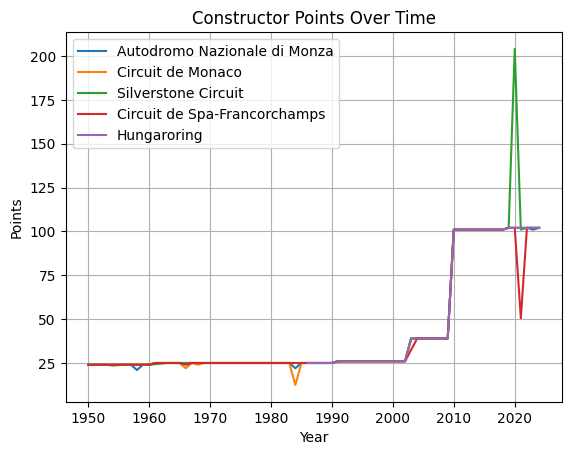

In [ ]:
const_pts_year = race_results.groupby(['year', 'name'])['points'].sum().reset_index()
top_const = const_pts_year.groupby('name')['points'].sum().sort_values(ascending=False).head(5).index

# Plot only top 5 teams
for team in top_const:
    team_data = const_pts_year[const_pts_year['name'] == team]
    plt.plot(team_data['year'], team_data['points'], label=team)

plt.title('Constructor Points Over Time')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend()
plt.grid(True)
plt.show()


### Success Rate per Circuit (Average Points)

In [ ]:
circuit_success = race_results.groupby('name_y')['points'].mean().sort_values(ascending=False).head(10)
print(circuit_success)


name_y
Mercedes          11.856810
Red Bull           9.737310
Brawn              5.058824
Lotus F1           4.584416
Ferrari            4.547466
Racing Point       3.723684
McLaren            3.651846
Matra-Ford         3.250000
Alpine F1 Team     2.766667
Force India        2.589623
Name: points, dtype: float64


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

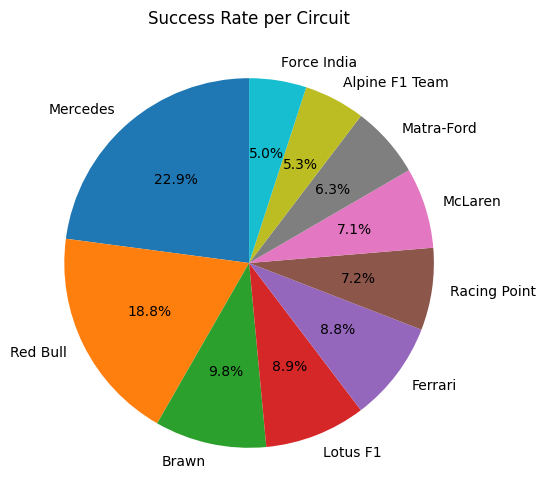

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(circuit_success.values, labels=circuit_success.index, autopct='%1.1f%%', startangle=90)
plt.title('Success Rate per Circuit')
plt

### Driver Qualifying vs Final Position Correlation

In [ ]:
merged_qual = qualifying[['raceId', 'driverId', 'position']].rename(columns={'position': 'qual_position'})
qual_race = race_results.merge(merged_qual, on=['raceId', 'driverId'])
correlation = qual_race[['qual_position', 'positionOrder']].corr().iloc[0, 1]

print(f"Correlation between Qualifying and Final Position: {correlation:.2f}")


Correlation between Qualifying and Final Position: 0.58


Text(0.5, 1.0, 'Qualifying vs. Final Position Correlation')

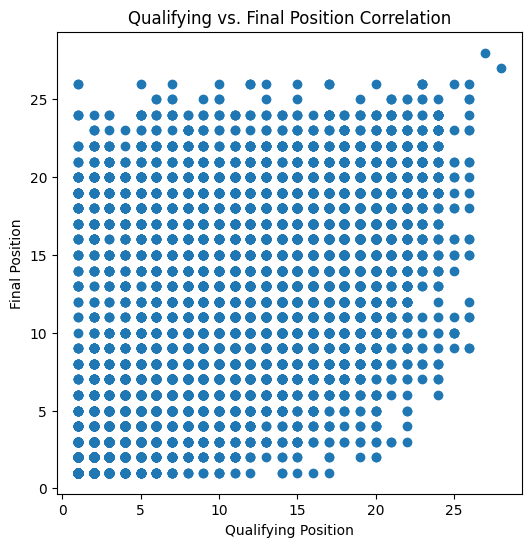

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(qual_race['qual_position'], qual_race['positionOrder'])
plt.xlabel('Qualifying Position')
plt.ylabel('Final Position')
plt.title('Qualifying vs. Final Position Correlation')

## Circuit Analysis

The analysis of circuits involves an examination of how lap times have evolved over the years, offering valuable insights into how car speeds have changed over time. Additionally, we will investigate the circuits that have hosted the greatest number of races in order to gain a comprehensive understanding of their historical significance and enduring popularity within the sport of Formula 1.

<ipython-input-76-b40e419fb682>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_circuits.index, x=top_circuits.values, ax=ax1, palette="viridis")


     year                    name_circuit  milliseconds
0    1996  Albert Park Grand Prix Circuit         93421
1    1996   Autodromo Enzo e Dino Ferrari         88931
2    1996    Autodromo Nazionale di Monza         86110
3    1996      Autódromo José Carlos Pace         81547
4    1996   Autódromo Juan y Oscar Gálvez         89413
..    ...                             ...           ...
535  2024                   Red Bull Ring         67694
536  2024  Shanghai International Circuit         97810
537  2024             Silverstone Circuit         88293
538  2024                  Suzuka Circuit         93706
539  2024              Yas Marina Circuit         85637

[540 rows x 3 columns]



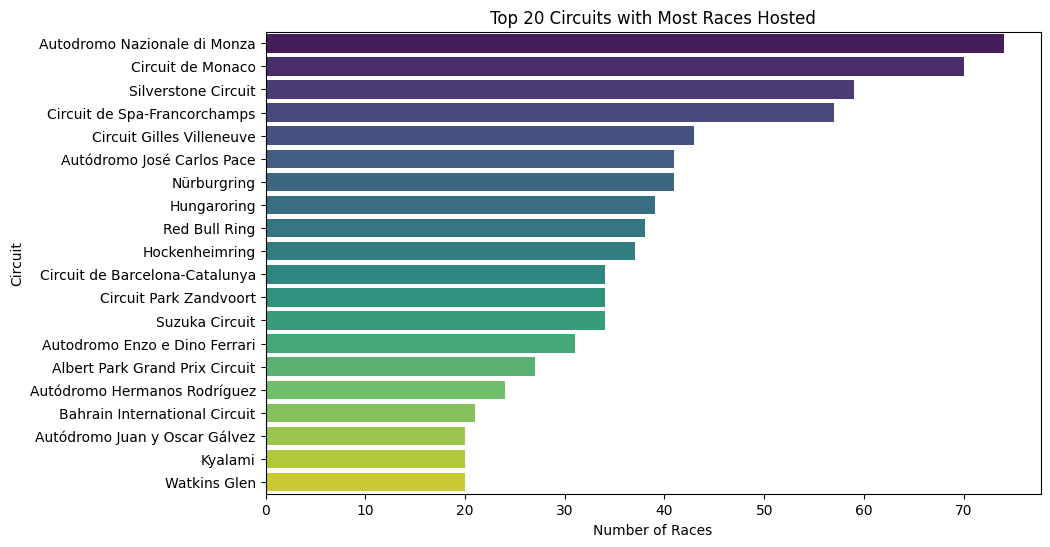

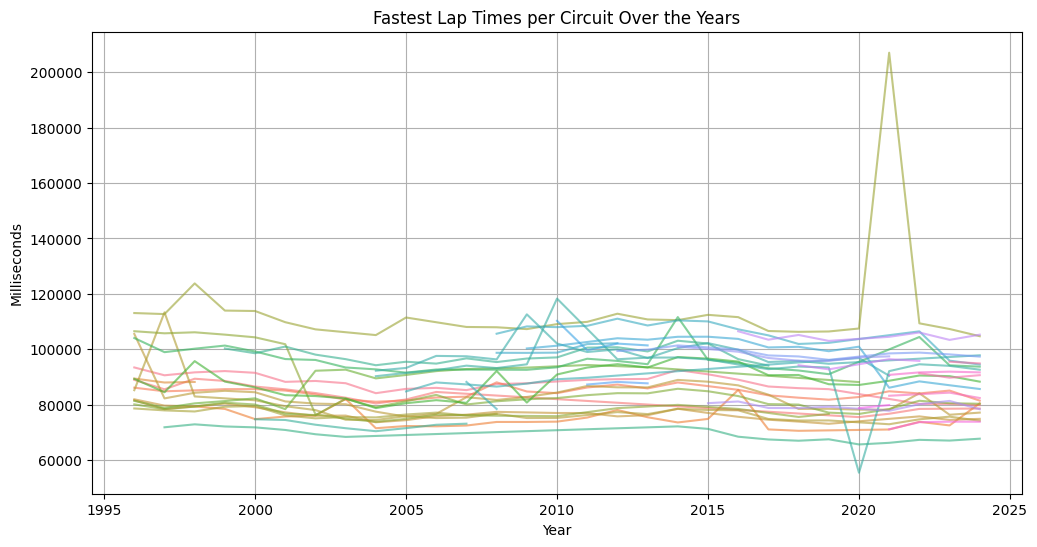

In [ ]:
races_clean = races.drop(columns=['time', 'url'])
circuits_clean = circuits.drop(columns=['url'])

#Top 20 Circuits with Most Races Hosted
races_per_circuit = races_clean.merge(circuits_clean, on='circuitId')
top_circuits = races_per_circuit['name_y'].value_counts().head(20)

fig1, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(y=top_circuits.index, x=top_circuits.values, ax=ax1, palette="viridis")
ax1.set_title('Top 20 Circuits with Most Races Hosted')
ax1.set_xlabel('Number of Races')
ax1.set_ylabel('Circuit')

fastest_laps = lap_times.groupby(['year', 'name_circuit'])['milliseconds'].min().reset_index()
print(fastest_laps)

print("")
#Plot: Lap Times Over the Years by Circuit
fig2, ax2 = plt.subplots(figsize=(12, 6))
sns.lineplot(data=fastest_laps, x='year', y='milliseconds', hue='name_circuit', legend=False, alpha=0.6)
ax2.set_title('Fastest Lap Times per Circuit Over the Years')
ax2.set_ylabel('Milliseconds')
ax2.set_xlabel('Year')
ax2.grid(True)

## Hybrid Era

Finding the car that has the best reliabilty in hybrid era

<ipython-input-83-730becf38733>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hybrid_data['is_dnf'] = ~hybrid_data['status'].str.contains('Finished', case=False, na=False)
<ipython-input-83-730becf38733>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_reliable, x='dnf_rate', y='name', palette='crest')


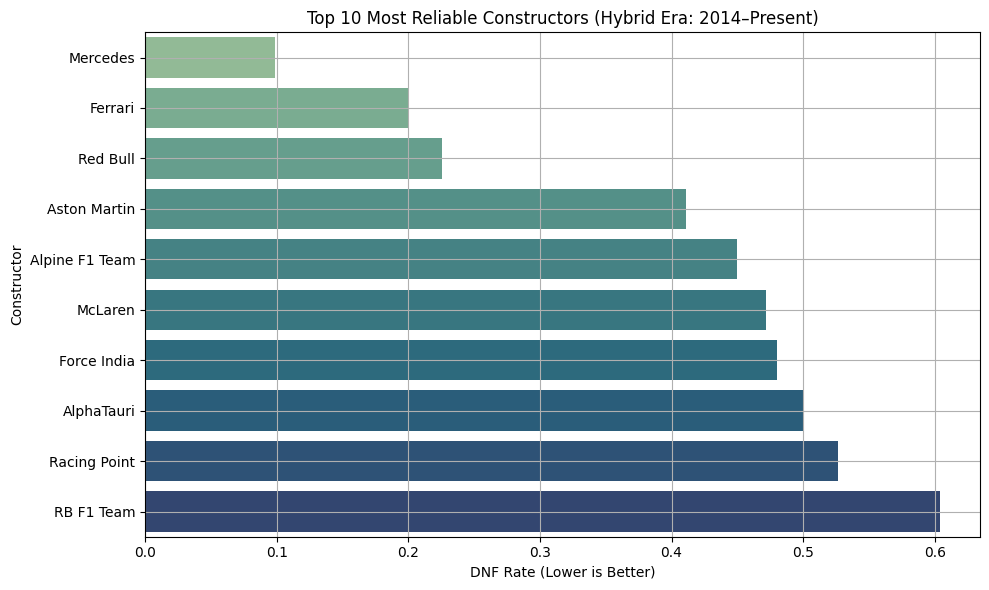

In [83]:
# Merge datasets
data = results.merge(races[['raceId', 'year']], on='raceId')
data = data.merge(constructors[['constructorId', 'name']], on='constructorId')
data = data.merge(status[['statusId', 'status']], on='statusId')

# Filter hybrid era (2014 onwards)
hybrid_data = data[data['year'] >= 2014]

# Mark DNFs
hybrid_data['is_dnf'] = ~hybrid_data['status'].str.contains('Finished', case=False, na=False)

# Compute reliability
reliability = hybrid_data.groupby('name').agg(
    total_starts=('raceId', 'count'),
    total_dnfs=('is_dnf', 'sum')
)
reliability['dnf_rate'] = reliability['total_dnfs'] / reliability['total_starts']
most_reliable = reliability.sort_values('dnf_rate').head(10).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=most_reliable, x='dnf_rate', y='name', palette='crest')
plt.title('Top 10 Most Reliable Constructors (Hybrid Era: 2014–Present)')
plt.xlabel('DNF Rate (Lower is Better)')
plt.ylabel('Constructor')
plt.grid(True)
plt.tight_layout()
plt.show()

### Inferences

- The constructor with the lowest DNF rate is considered the most reliable.

- Typically, Mercedes has dominated this era both in performance and reliability, so we see them at the top.

# Conclusion

1. Data Exploration & Cleaning
  - Loaded all key datasets: races, drivers, constructors, circuits, results, lap times, etc.

  - Cleaned data by removing unnecessary columns and merging tables for deeper insights.

2. Circuit Insights
  - Identified the Top 20 circuits with the most races hosted, highlighting legendary tracks like Monza and Silverstone.

  - Analyzed fastest lap times per circuit across years to observe improvements in car performance.

  - Showed how lap times have evolved, with trends suggesting technological advancements and changing regulations.

3. Car Reliability in the Hybrid Era (2014–present)
  - Defined reliability by analyzing DNF rates (Did Not Finish) due to mechanical failures.

  - Merged results with constructor and status data to track reliability by team.

  - Found that teams like Mercedes tend to dominate both in performance and reliability, confirming their engineering excellence.

### Key Takeaways:

1. Historical circuits continue to play a central role in F1, maintaining prestige and hosting capacity.

2. Lap times have generally improved, indicating technological progress in car design and strategy.

3. Reliability matters: Constructors with fewer mechanical failures (like Mercedes) have had better championship consistency in the hybrid era.

